In [13]:
from src.material.color import to_u8, to_u8_color
from src.render.helpers import ray_color
from typing import Tuple, List
from dataclasses import dataclass
from src.render.loops.render_loop import RenderLoop
from src import Color
from src.material.material.phong_material import PhongMaterial
from src import Sphere, Vertex, World, PointLight, Camera, Resolution, Vector, Scene
from src import ipynb_display_images
from src.render.render_config import RenderConfig


# Simple Render Loop Example
- This render loop iterates over each pixel, generates a ray from the camera, and computes the color using ray tracing.
- The resulting pixel colors are returned as a list of RGB tuples.

In [14]:
@dataclass
class MySimpleRenderLoop(RenderLoop):
    def render_pixel(self, i: int, j: int) -> Tuple[int, int, int]:
        u = (i / (self.width - 1)) - 0.5
        v = ((self.height - 1 - j) / (self.height - 1)) - 0.5
        ray = self.camera.make_ray(u, v)

        col = ray_color(
                ray = ray,
                world = self.world,
                lights = self.lights,
                depth = self.max_depth,
                shader = self.shader,
                skybox = self.skybox
            )
        return to_u8(col.r), to_u8(col.g), to_u8(col.b)


    def render_all_pixels(self) -> Tuple[List[Tuple[int, int, int]], int, int]:
        pixels: List[Tuple[int, int, int]] = []

        for row in range(self.height):
            for column in range(self.width):
                pixels.append(self.render_pixel(column, row))

        return pixels, self.width, self.height

In [15]:
from src.geometry.objects.torus import Torus

glossy_green = PhongMaterial(
    name="glossy_green",
    base_color=Color.custom_rgb(50, 255, 50),
    spec_color=Color.custom_rgb(255, 255, 255),
    shininess=50,
    ior=1.5,
    reflectivity=0.4,
    transparency=0.0
)

world = World()
world.add(
    Torus(
        center=Vertex(0, 0, -5),
        radius_major=1.0,
        radius_tube=0.3,
        material=glossy_green
    ),
)

point_light = PointLight(position=Vertex(5, 5, 0), intensity=2000.0, falloff=0.01)

camera = Camera(
    fov = 30,
    aspect_ratio = Resolution.R360p.aspect_ratio,
    origin = Vertex(0, 3, 0),
    direction = Vector(0, -0.65, -1),
)

scene = Scene(
    camera = camera,
    world = world,
    lights = [point_light],
    skybox_path = "./skybox/shanghai_4k.hdr"
)

scene.validate()

Scene validation passed.


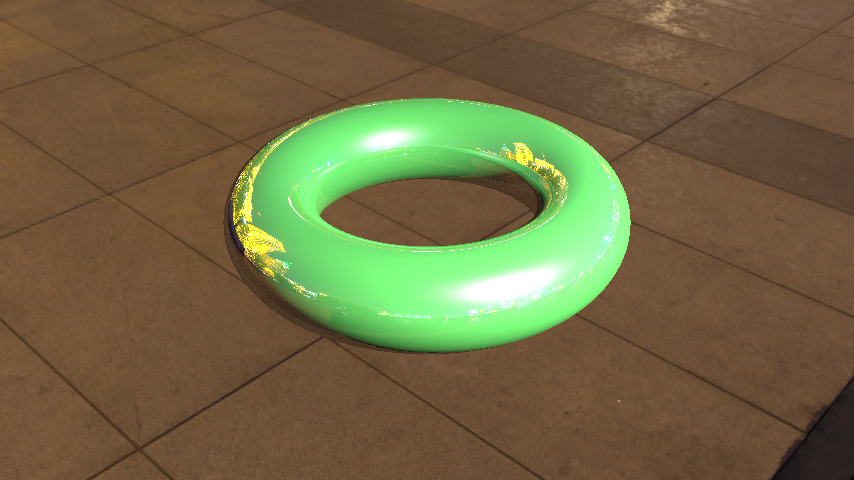

In [16]:
render_configuration = RenderConfig(
    resolution=Resolution.R480p,
    max_depth=10,
)

ray_tracer = MySimpleRenderLoop(
    scene=scene,
    render_config=render_configuration,
)

path = ray_tracer.render("images/my_simple_render_loop.png")
ipynb_display_images(path)